In [96]:
import numpy as np
import pandas as pd
import keras
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from math import cos, sin, atan
from sklearn.utils import class_weight
from sklearn.preprocessing import StandardScaler
import innvestigate

In [97]:
df = pd.read_csv('parkin_data/parkinsons.data')

In [98]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [99]:
#getting the feature and labels
features=df.loc[:,df.columns!='status'].values[:,1:] 
#we are ignoring status which is the result and the first column which are the signed name of the patients
labels=df.loc[:,'status'].values

In [100]:
# scaler=MinMaxScaler((-1,1)) #normalizes the data which makes the model less bais
# x=scaler.fit_transform(features)
# labels = to_categorical(df.status)
x = features
y=labels

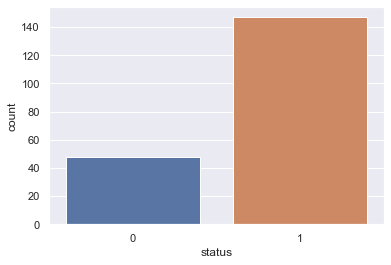

In [101]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="status", data=df)

In [102]:
print(df.describe())
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)

       MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000

In [103]:
n_cols = features.shape[1]

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(n_cols, )))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [32]:
# Train your model for 25 epochs
model_history = model.fit(x_train, y_train, epochs=30)

# Evaluate your model accuracy on the test set
accuracy = model.evaluate(x_test, y_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

Epoch 1/30
156/156 [==============================] - 0s 2ms/step - loss: 4.1900 - acc: 0.7372
Epoch 2/30
156/156 [==============================] - 0s 49us/step - loss: 4.1900 - acc: 0.7372
Epoch 3/30
156/156 [==============================] - 0s 59us/step - loss: 4.1900 - acc: 0.7372
Epoch 4/30
156/156 [==============================] - 0s 130us/step - loss: 4.1900 - acc: 0.7372
Epoch 5/30
156/156 [==============================] - 0s 165us/step - loss: 4.1900 - acc: 0.7372
Epoch 6/30
156/156 [==============================] - 0s 116us/step - loss: 4.1900 - acc: 0.7372
Epoch 7/30
156/156 [==============================] - 0s 193us/step - loss: 4.1900 - acc: 0.7372
Epoch 8/30
156/156 [==============================] - 0s 189us/step - loss: 4.1900 - acc: 0.7372
Epoch 9/30
156/156 [==============================] - 0s 184us/step - loss: 4.1900 - acc: 0.7372
Epoch 10/30
156/156 [==============================] - 0s 120us/step - loss: 4.1900 - acc: 0.7372
Epoch 11/30
156/156 [============

In [33]:
# plt.plot(accuracy.history['loss'])
# plt.xlabel('Epochs')
# plt.ylabel('Validation score')
# plt.show()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                1472      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.predict(x_test)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [35]:
[print(i.shape, i.dtype) for i in model.inputs]
[print(o.shape, o.dtype) for o in model.outputs]
[print(l.name, l.input_shape, l.dtype) for l in model.layers]

(?, 22) <dtype: 'float32'>
(?, 1) <dtype: 'float32'>
dense_5 (None, 22) float32


AttributeError: 'Dense' object has no attribute 'dtype'

In [36]:
#Dump Weights
bias_list = []
weight_list = [] 
for layerNum, layer in enumerate(model.layers):
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    bias_list.append(biases)
    weight_list.append(weights)
    
    
    for toNeuronNum, bias in enumerate(biases):
        print('printing biases')
        print(f'{layerNum}B -> L{layerNum+1}N{toNeuronNum}: {bias}')
    
    for fromNeuronNum, wgt in enumerate(weights):
        for toNeuronNum, wgt2 in enumerate(wgt):
            print('printing weight')
            print(f'L{layerNum}N{fromNeuronNum} \
                  -> L{layerNum+1}N{toNeuronNum} = {wgt2}')

printing biases
0B -> L1N0: 0.0
printing biases
0B -> L1N1: 0.0
printing biases
0B -> L1N2: 0.0
printing biases
0B -> L1N3: 0.0
printing biases
0B -> L1N4: 0.0
printing biases
0B -> L1N5: 0.0
printing biases
0B -> L1N6: 0.0
printing biases
0B -> L1N7: 0.0
printing biases
0B -> L1N8: 0.0
printing biases
0B -> L1N9: 0.0
printing biases
0B -> L1N10: 0.0
printing biases
0B -> L1N11: 0.0
printing biases
0B -> L1N12: 0.0
printing biases
0B -> L1N13: 0.0
printing biases
0B -> L1N14: 0.0
printing biases
0B -> L1N15: 0.0
printing biases
0B -> L1N16: 0.0
printing biases
0B -> L1N17: 0.0
printing biases
0B -> L1N18: 0.0
printing biases
0B -> L1N19: 0.0
printing biases
0B -> L1N20: 0.0
printing biases
0B -> L1N21: 0.0
printing biases
0B -> L1N22: 0.0
printing biases
0B -> L1N23: 0.0
printing biases
0B -> L1N24: 0.0
printing biases
0B -> L1N25: 0.0
printing biases
0B -> L1N26: 0.0
printing biases
0B -> L1N27: 0.0
printing biases
0B -> L1N28: 0.0
printing biases
0B -> L1N29: 0.0
printing biases
0B -

printing weight
L0N21                   -> L1N40 = -0.19096791744232178
printing weight
L0N21                   -> L1N41 = 0.012640595436096191
printing weight
L0N21                   -> L1N42 = -0.2628532946109772
printing weight
L0N21                   -> L1N43 = 0.12558236718177795
printing weight
L0N21                   -> L1N44 = 0.04949614405632019
printing weight
L0N21                   -> L1N45 = -0.043603211641311646
printing weight
L0N21                   -> L1N46 = -0.2001449167728424
printing weight
L0N21                   -> L1N47 = -0.23411494493484497
printing weight
L0N21                   -> L1N48 = 0.09204867482185364
printing weight
L0N21                   -> L1N49 = 0.10853660106658936
printing weight
L0N21                   -> L1N50 = -0.12988978624343872
printing weight
L0N21                   -> L1N51 = -0.0626651793718338
printing weight
L0N21                   -> L1N52 = -0.11979782581329346
printing weight
L0N21                   -> L1N53 = -0.1370107829570770

L1N23                   -> L2N22 = 0.022298336029052734
printing weight
L1N23                   -> L2N23 = -0.2404770851135254
printing weight
L1N23                   -> L2N24 = -0.18454289436340332
printing weight
L1N23                   -> L2N25 = 0.21833515167236328
printing weight
L1N23                   -> L2N26 = 0.16664379835128784
printing weight
L1N23                   -> L2N27 = 0.23000502586364746
printing weight
L1N23                   -> L2N28 = 0.06986606121063232
printing weight
L1N23                   -> L2N29 = 0.09320104122161865
printing weight
L1N23                   -> L2N30 = -0.20069628953933716
printing weight
L1N23                   -> L2N31 = 0.2364274263381958
printing weight
L1N24                   -> L2N0 = -0.007533133029937744
printing weight
L1N24                   -> L2N1 = 0.05252629518508911
printing weight
L1N24                   -> L2N2 = -0.17916840314865112
printing weight
L1N24                   -> L2N3 = 0.016713738441467285
printing weight
L1N2

L2N4                   -> L3N0 = -0.26387089490890503
printing weight
L2N4                   -> L3N1 = -0.1619134396314621
printing weight
L2N4                   -> L3N2 = 0.1125960648059845
printing weight
L2N4                   -> L3N3 = -0.06700733304023743
printing weight
L2N4                   -> L3N4 = -0.08550727367401123
printing weight
L2N4                   -> L3N5 = 0.2645234763622284
printing weight
L2N4                   -> L3N6 = -0.023089885711669922
printing weight
L2N4                   -> L3N7 = 0.09586891531944275
printing weight
L2N4                   -> L3N8 = 0.09338662028312683
printing weight
L2N4                   -> L3N9 = -0.25004637241363525
printing weight
L2N4                   -> L3N10 = 0.15955236554145813
printing weight
L2N4                   -> L3N11 = -0.3430258631706238
printing weight
L2N4                   -> L3N12 = 0.2675337493419647
printing weight
L2N4                   -> L3N13 = 0.13449186086654663
printing weight
L2N4                   -> L

In [101]:
def calculate_xi_times_wij(x, w):
    return x*w


def calculate_total_layer_xi_times_wij(wij_list, xi_list):
    return sum([calculate_xi_times_wij(x=xi, w=wij) for xi, wij in zip(wij_list, xi_list)])


def calculate_hidden_layer_inputs(input, weights, bias):
    for layer, neurons in enumerate(weights):
        hidden_input_sums = []
        for neuron, weights in enumerate(neurons):
            for output_neuron, weight in enumerate(weights):
                if len(hidden_input_sums) <= output_neuron:
                    hidden_input_sums.append(bias[layer][output_neuron] + calculate_xi_times_wij(x=input[layer][neuron], w= weight))
                else:
                    hidden_input_sums [output_neuron] += calculate_xi_times_wij(x=input[layer][neuron], w= weight)
        if len(weights) -1 != layer:
            for i in range(len(hidden_input_sums)):
                hidden_input_sums[i] = max(hidden_input_sums[i],0)
        input.append(hidden_input_sums)

    return input


def get_last_layer_weight_list(param):
    a = []
    for i in param:
        for j in i:
            a.append(j)
    return a


def calculate_lrp_z(input, weights, bias, output, layers):
    output_layer = output
    relevance_list = [output_layer]
    relevance_neuron_index = 0
    relevance_layer_index =0
    layers = layers-1


    for layer in range(layers, -1, -1):
        layer_relevance = []
        if (len(weights) -1 ) == layer:
            wij_list = get_last_layer_weight_list(weights[layer])
            sum_of_layer_xi_times_wij = calculate_total_layer_xi_times_wij(xi_list=input[layer], wij_list=wij_list)
            for i in range(len(input[layer])):
                z_ij = calculate_xi_times_wij(input[layer][i], wij_list[i])
                relevance = z_ij * relevance_list[relevance_layer_index][relevance_neuron_index] /sum_of_layer_xi_times_wij
                layer_relevance.append(relevance)
            relevance_layer_index+=1
            relevance_neuron_index=0
            relevance_list.append(layer_relevance)
        else:
            for output_neuron, wij_list in enumerate(weights[layer]):
                sum_of_layer_xi_times_wij = calculate_total_layer_xi_times_wij(xi_list=input[layer], wij_list=wij_list)
                layer_relevance = []
                maximum_layer_relevance = max(relevance_list[relevance_layer_index])
                for i in range(len(input[layer])):
                    z_ij = calculate_xi_times_wij(input[layer][i], wij_list[i])
                    relevance = z_ij * maximum_layer_relevance / sum_of_layer_xi_times_wij
                    layer_relevance.append(relevance)

                relevance_neuron_index += 1
                relevance_list.append(layer_relevance)
            relevance_layer_index += 1
            # relevance_neuron_index = 0

    return relevance_list
    

In [102]:
for index in range(1):
    input = [x_test[index]]
    input__with_hidden_layer = calculate_hidden_layer_inputs(input, weight_list, bias_list)
    layers = len(model.layers)
    output = [y_test[index]]
    
    a = calculate_lrp_z(input__with_hidden_layer, weight_list, bias_list, output, layers)
    

3
0
0
[[0]]


In [107]:
analyzer = innvestigate.create_analyzer("lrp.alpha_2_beta_1", model)
analyzer.fit(x_train)
analysis = analyzer.analyze(x_test)

/home/itachiuchiha/drive1/bracu/final-present/innvestigate/analyzer/base.py:130: RuntimeWarning: This analyzer does not need to be trained. Still fit() is called.
  " Still fit() is called.", RuntimeWarning)


In [104]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)
class_weight = {0: 3.,
                1: 1.}



scaler = StandardScaler()

scaler.fit(x_train)

x_train_normal = scaler.transform(x_train)
x_test=scaler.transform(x_test)



model.fit(x_train_normal, y_train, batch_size=16, epochs=25, verbose=1, validation_data=(x_test, y_test),class_weight=class_weight)




/home/itachiuchiha/drive1/bracu/ve/env3/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass classes=[0 1], y=[1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0
 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 1
 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1
 1 0 1 1 1 1 1 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


Train on 156 samples, validate on 39 samples
Epoch 1/25
156/156 [==============================] - 1s 5ms/step - loss: 0.9886 - acc: 0.6474 - val_loss: 0.6080 - val_acc: 0.6667
Epoch 2/25
156/156 [==============================] - 0s 104us/step - loss: 0.8759 - acc: 0.7179 - val_loss: 0.5431 - val_acc: 0.7436
Epoch 3/25
156/156 [==============================] - 0s 199us/step - loss: 0.7688 - acc: 0.7244 - val_loss: 0.4908 - val_acc: 0.7692
Epoch 4/25
156/156 [==============================] - 0s 299us/step - loss: 0.6844 - acc: 0.7500 - val_loss: 0.4387 - val_acc: 0.8205
Epoch 5/25
156/156 [==============================] - 0s 135us/step - loss: 0.6123 - acc: 0.7692 - val_loss: 0.3873 - val_acc: 0.8462
Epoch 6/25
156/156 [==============================] - 0s 225us/step - loss: 0.5526 - acc: 0.7628 - val_loss: 0.3308 - val_acc: 0.8462
Epoch 7/25
156/156 [==============================] - 0s 180us/step - loss: 0.5098 - acc: 0.8077 - val_loss: 0.3003 - val_acc: 0.8462
Epoch 8/25
156/156 

In [105]:
y_res = model.predict(x_test)
y_res

array([[0.09828657],
       [0.82892513],
       [0.9206382 ],
       [0.99998844],
       [0.99999994],
       [1.        ],
       [0.90672576],
       [0.99978435],
       [0.99452436],
       [0.9999963 ],
       [0.01212236],
       [0.90860665],
       [0.9999926 ],
       [0.00641432],
       [0.99703014],
       [0.9998469 ],
       [0.99999344],
       [0.00402084],
       [0.15022013],
       [1.        ],
       [0.98839784],
       [0.9960092 ],
       [0.9831278 ],
       [1.        ],
       [0.9999987 ],
       [0.9935063 ],
       [0.12072954],
       [0.9930923 ],
       [0.98217386],
       [0.99995047],
       [0.99999976],
       [0.9999508 ],
       [0.9526673 ],
       [0.9999509 ],
       [0.7082787 ],
       [0.741762  ],
       [0.9999701 ],
       [0.973182  ],
       [0.99905056]], dtype=float32)

In [84]:
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [106]:
# Evaluate your model accuracy on the test set
accuracy = model.evaluate(x_test, y_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

39/39 [==============================] - 0s 106us/step
Accuracy: 0.9743589758872986


In [108]:
analysis

array([[-1.30180977e-02, -2.45046094e-02, -1.34435128e-02,
         7.32153980e-03,  2.77914498e-02, -2.65099516e-04,
         1.48618547e-02, -7.77002017e-04, -2.21435912e-05,
         1.68921379e-03,  8.85257381e-04, -2.33892526e-04,
        -4.63585835e-03, -5.51071577e-03,  9.89061780e-03,
        -4.26968327e-03,  1.88584831e-02, -5.37537783e-02,
        -2.09133532e-02,  3.77348028e-02,  9.44174901e-02,
        -4.92527522e-02],
       [ 1.79894686e-01, -3.98663044e-01,  2.02773988e-01,
         2.67216228e-02, -2.02919811e-01,  9.57651883e-02,
         4.62289378e-02, -1.04850449e-01, -4.36081663e-02,
         1.07801199e-01, -1.58772677e-01,  2.28160322e-01,
        -3.57499063e-01, -1.17437325e-01, -3.84470541e-03,
         2.11273581e-01,  6.40199631e-02,  9.92933810e-02,
        -4.31374788e-01,  8.53026032e-01,  6.89089417e-01,
        -5.58902264e-01],
       [-1.46243423e-01, -4.19174172e-02, -2.60209620e-01,
        -4.42604542e-01, -2.91128427e-01, -1.94225684e-01,
    